In [1]:
from sko.GA import GA
import numpy as np
 
def adapt(x):
    return 2 * pow(x, 2)
 
# func 适应度函数
# n_dim 自变量的个数
# size_pop 种群初始化个体数量
# max_iter 进化迭代次数
# prob_mut 变异概率
# lb 自变量下限
# ub 自变量上限
# precision 精度
def schaffer(p):
    '''
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    '''
    x1, x2 = p
    x = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(x)) - 0.5) / np.square(1 + 0.001 * x)


ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=800, prob_mut=0.001, lb=[-1, -1], ub=[1, 1], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [2.08616263e-07 8.94069698e-08] 
 best_y: [0.]


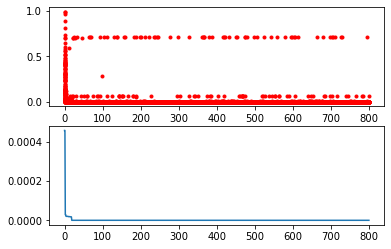

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [3]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

num_points = 50

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
points_coordinate

array([[0.08823651, 0.31194221],
       [0.08281047, 0.10876889],
       [0.3582319 , 0.55180048],
       [0.20753592, 0.41959102],
       [0.50068717, 0.23488941],
       [0.75922728, 0.22029501],
       [0.91682697, 0.47628699],
       [0.03921446, 0.12576726],
       [0.39496896, 0.53107467],
       [0.24874305, 0.39031078],
       [0.67330202, 0.92884491],
       [0.73269692, 0.92784382],
       [0.34138371, 0.03031475],
       [0.41918024, 0.45734896],
       [0.04070686, 0.65659156],
       [0.99550132, 0.58916266],
       [0.46162521, 0.65194256],
       [0.69556505, 0.20120341],
       [0.81872772, 0.2891809 ],
       [0.31951599, 0.4869601 ],
       [0.35138169, 0.37140517],
       [0.19624914, 0.01711561],
       [0.16577363, 0.97178648],
       [0.07195403, 0.18737514],
       [0.42941597, 0.8719747 ],
       [0.93516252, 0.27157191],
       [0.80038142, 0.23331882],
       [0.81415473, 0.6005267 ],
       [0.02533436, 0.80403223],
       [0.05482849, 0.92547914],
       [0.

In [4]:
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
distance_matrix

array([[0.        , 0.20324576, 0.36115024, ..., 0.9485101 , 0.62598131,
        0.78362873],
       [0.20324576, 0.        , 0.5216646 , ..., 1.07243121, 0.67077551,
        0.74494603],
       [0.36115024, 0.5216646 , 0.        , ..., 0.596684  , 0.4156014 ,
        0.68895184],
       ...,
       [0.9485101 , 1.07243121, 0.596684  , ..., 0.        , 0.50356947,
        0.76341405],
       [0.62598131, 0.67077551, 0.4156014 , ..., 0.50356947, 0.        ,
        0.31196479],
       [0.78362873, 0.74494603, 0.68895184, ..., 0.76341405, 0.31196479,
        0.        ]])

In [5]:
def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


In [6]:
from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()

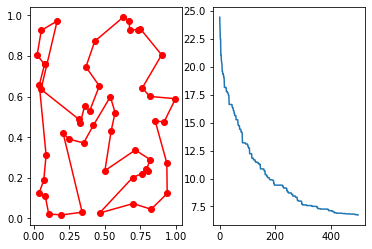

In [7]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sko.GA import GA
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 
 
#首先学习一下官方文档
 
'''
min f(x1, x2, x3) = x1^2 + x2^2 + x3^2
s.t.
    x1*x2 >= 1
    x1*x2 <= 5
    x2 + x3 = 1
    0 <= x1, x2, x3 <= 5
'''
def obj_func(p):
    print(p)
    x1, x2, x3 = p
    return x1 ** 2 + x2 ** 2 + x3 ** 2
 
 
constraint_eq = [
    #等式约束条件：
    lambda x: 1 - x[1] - x[2]
]
 
constraint_ueq = [
    #不等式约束条件：
    lambda x: 1 - x[0] * x[1],
    lambda x: x[0] * x[1] - 5
    #无需使用不等式表示，直接使用表达式即可，但该表达式需要小于等于0，列如第一个约束条件5>=x1*x2,则改写成x1*x2-5：
]
 
 
 
ga = GA(func=obj_func,n_dim=3,size_pop=50,max_iter=100,lb=[0,0,0],ub=[5,5,5]
        ,constraint_eq = constraint_eq
        ,constraint_ueq=constraint_ueq
        ,precision=[1,0.1,0.01])
#func：需要优化的目标，n_dim:优化参数个数，lb、ub参数的上下界,constraint_eq、constraint_ueq：约束条件，
# precision：可以使用整数或浮点数，若使用整数例如1则自变量会启用整数规划模式，浮点数同理，但是优化结果得到的整数是带有小数点的（1.0000），在有些情况下比如random_state他的值必须是个整数，此时需要将结果转成整型
best_x,best_y = ga.run()
print('best_x:', best_x,'\n','best_y:',best_y)
 
 

 

[5.         0.         3.73776908]
[3.         1.34920635 2.94520548]
[2.         0.31746032 3.29745597]
[5.         2.77777778 2.33855186]
[5.         5.         4.97064579]
[5.         1.98412698 4.95107632]
[2.         0.87301587 2.68101761]
[4.         2.77777778 4.74559687]
[5.         3.41269841 3.94324853]
[3.         3.49206349 3.40508806]
[1.         3.49206349 1.75146771]
[5.         0.15873016 2.26027397]
[5.         3.33333333 3.38551859]
[0.         1.74603175 4.46183953]
[5.         0.         0.96868885]
[5.         0.23809524 3.87475538]
[5.         1.58730159 3.12133072]
[4.         3.49206349 0.49902153]
[5.         2.93650794 1.04696673]
[1.         0.95238095 4.8630137 ]
[3.         3.17460317 1.71232877]
[1.         4.36507937 3.23874755]
[5.         4.20634921 0.98825832]
[1.         0.55555556 3.18003914]
[5.         1.50793651 1.52641879]
[0.         3.57142857 0.63600783]
[2.         1.50793651 4.65753425]
[3.         4.68253968 3.84540117]
[4.         3.174603

In [20]:
#网上大部分例子都是和官方给出的差不多，我尝试使用该包来优化skearn中的逻辑回归模型，该例子比较简单
# 逻辑回归参数解释 https://www.jianshu.com/p/5e92abd6a3f0 
 
iris = load_iris()
xtrain,xtest,ytrain,ytest = train_test_split(iris['data'],iris['target'],test_size=0.2)
def func(p):
    w1, w2 = p
    clf = LogisticRegression(max_iter=int(w1) # 最大迭代次数
                             , random_state=int(w2) 
                             )
    clf.fit(xtrain,ytrain)
    score = clf.score(xtest,ytest)
    # print(f"scroe:{-score}")
    return -score #由于这里的GA默认求得最小值，而我们想要score达到最大值，因此需要在score前加负号
 
ga = GA(func=func, n_dim=2, size_pop=50, max_iter=10, lb=[0, 0],ub=[100, 42],precision=[1,1])
best_x,best_y = ga.run()
print('best_x:', best_x,'\n','best_y:',best_y

/home/zhangmanman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zhangmanman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

best_x: [100.  18.] 
 best_y: [-1.]


/home/zhangmanman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zhangmanman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [22]:
best_x[0]

100.0

In [28]:
clf = LogisticRegression(max_iter=int(best_x[0]) # 最大迭代次数
                             , random_state=int(best_x[-1])
                             ,penalty="l1"
                             ,solver="liblinear"
                             )
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.9666666666666667

In [29]:
predicty=clf.predict(X=xtest) 
ytest - predicty

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0])